# Set up

In [50]:
import tensorflow as tf
import os
from keras.utils import img_to_array, load_img
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import pandas as pd
from matplotlib import pyplot as plt

trainPath = r"C:\Users\gener\OneDrive\Documents\fruits360\fruits-360\train-small"
testPath = r"C:\Users\gener\OneDrive\Documents\fruits360\fruits-360\test-small"

batchSize = 64      # Reduce value if you have less GPU


# Create models

In [51]:
def model1(numClasses):
    """
    This model is from the Eran guy's tutorial
    """
    model = Sequential()
    # Base
    model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(100,100,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))
    model.add(Flatten())
    # Head
    model.add(Dense(3000, activation="relu"))
    model.add(Dense(1000, activation="relu"))
    model.add(Dense(numClasses, activation="softmax"))
    return model

def model2(numClasses):
    """
    Tries reorganizing and standardizing convolutional blocks based on Kaggle lesson
    """
    model = Sequential()
    # Base
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(100,100,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D())
    # Head
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dense(numClasses, activation="softmax"))     # CHANGE THE 131
    return model

# def model3():
#     """
#     Uses depthwise convolutional blocks
#     """
#     from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Reshape, Activation, Add

# def conv_block(inputs, filters, kernel_size, strides):
#     model = Sequential()
#     model.add(Conv2D(filters, kernel_size, strides=strides, padding='same'))
#     model.add(Activation('relu'))
#     return model(inputs)

# def depthwise_conv_block(inputs, kernel_size, strides):
#     model = Sequential()
#     model.add(DepthwiseConv2D(kernel_size, strides=strides, padding='same'))
#     model.add(Activation('relu'))
#     model.add(Conv2D(256, (1, 1), padding='same'))
#     model.add(Activation('relu'))
#     return model(inputs)

# def mobileNetV3():
#     model = Sequential()
    
#     model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', input_shape=(224, 224, 3)))
    
#     model.add(conv_block(32, (3, 3), strides=(2, 2)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))
    
#     model.add(conv_block(64, (3, 3), strides=(2, 2)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))

#     model.add(conv_block(128, (3, 3), strides=(2, 2)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))

#     model.add(conv_block(256, (3, 3), strides=(2, 2)))
#     model.add(depthwise_conv_block((3, 3), strides=(1, 1)))

#     model.add(GlobalAveragePooling2D())
#     model.add(Reshape((1, 1, 256)))
    
#     model.add(Conv2D(1280, (1, 1), padding='same'))
#     model.add(Activation('relu'))
#     model.add(Conv2D(num_classes, (1, 1), padding='same'))
#     model.add(Activation('softmax'))
    
#     return model

# # Create the MobileNetV3 model
# model = mobileNetV3()

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# def model4(numClasses):
#     """
#     Use transfer learning with MobileNetV3 model.
#     """

# def model5(numClasses):
#     """
#     Try preprocessing layers 
#     """

# def model6(numClasses):
#     """
#     Two output layers for fruits and vegetables
#     """





# Train models

In [13]:
modelv2 = model1(5)

# Compile model
modelv2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Load data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, horizontal_flip=True, vertical_flip=True, zoom_range=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(trainPath, target_size=(100,100), batch_size=batchSize, color_mode="rgb", class_mode="categorical", shuffle=True)


test_generator = test_datagen.flow_from_directory(trainPath, target_size=(100,100), batch_size=batchSize, color_mode="rgb", class_mode="categorical")

stepsPerEpoch = np.ceil(train_generator.samples / batchSize)
validationSteps = np.ceil(test_generator.samples / batchSize)

# Early stopping
stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)

history = modelv2.fit(train_generator, steps_per_epoch=stepsPerEpoch, epochs=50, validation_data=test_generator, validation_steps=validationSteps, callbacks=[stop_early])

modelv2.save(r"C:\Users\gener\OneDrive\Documents\cv-food-app\fruits360Model-v2.h5") 

Found 2342 images belonging to 5 classes.
Found 2342 images belonging to 5 classes.
Epoch 1/50
37/37 [==============================] - 7s 159ms/step - loss: 0.4138 - accuracy: 0.8463 - val_loss: 0.0632 - val_accuracy: 0.9851
Epoch 2/50
37/37 [==============================] - 5s 141ms/step - loss: 0.1205 - accuracy: 0.9599 - val_loss: 0.0521 - val_accuracy: 0.9915
Epoch 3/50
37/37 [==============================] - 5s 135ms/step - loss: 0.0487 - accuracy: 0.9838 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 4/50
37/37 [==============================] - 5s 135ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/50
37/37 [==============================] - 5s 144ms/step - loss: 0.0116 - accuracy: 0.9953 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/50
37/37 [==============================] - 5s 132ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.2944e-04 - val_accuracy: 1.0000
Epoch 7/50
37/37 [==============================] - 5s 137ms

<Axes: >

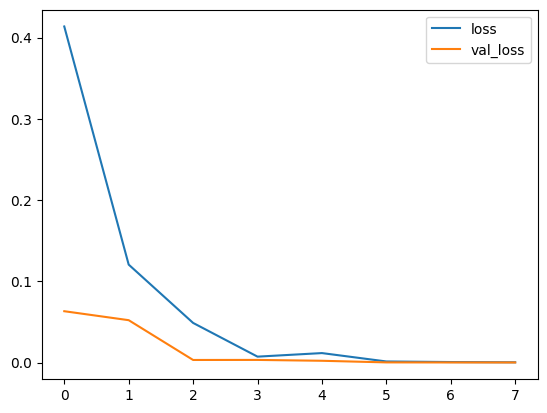

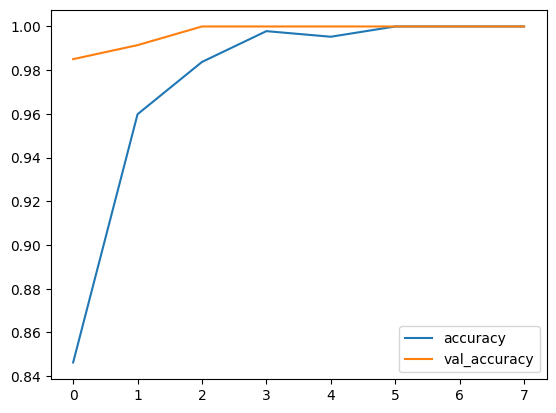

In [14]:
# Plot learning curves
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

# Test models

In [44]:
# Load model
modelv2 = tf.keras.models.load_model(r"C:\Users\gener\OneDrive\Documents\cv-food-app\fruits360Model-v2.h5")

# Load categories
source_folder = r"C:\Users\gener\OneDrive\Documents\fruits360\fruits-360\test-small"
categories = os.listdir(source_folder)
categories.sort()
# print(categories)
# print(len(categories))      # Should be 131

# Load and prepare image
def prepareImage(path):
    img = load_img(path, target_size=(100,100))
    imgResult = img_to_array(img)
    imgResult = np.expand_dims(imgResult, axis=0)
    imgResult = imgResult / 255.
    return imgResult

def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (100, 100)) # Resizing the image to 224x224 dimention
    return image


# testImagePath = r"C:\Users\gener\OneDrive\Documents\fruits360\fruits-360\test-small\Cocos\4_100.jpg"
testImagePath = r"C:\Users\gener\OneDrive\Documents\cv-food-app\fruit-images\coconut.jpg"

img = tf.io.read_file(testImagePath)
image = tf.image.decode_image(img, channels=3)

img = tf.image.resize(img, (100,100))

# img = load_img(testImagePath)
# img = scale_resize_image(img)
plt.imshow(img)
plt.show()

imgA = img_to_array(img)
print(imgA.shape)

# imageForModel = prepareImage(testImagePath)
# resultArray = modelv2.predict(imageForModel, verbose=0)
# print(resultArray)
# answers = np.argmax(resultArray, axis=1)
# print(categories[answers[0]])

# for i in os.listdir(testFolderPath):
#     imageForModel = prepareImage(testFolderPath + r"\\" + i)
#     resultArray = model.predict(imageForModel, verbose=0)
#     answers = np.argmax(resultArray, axis=1)
#     print(i)
#     print(categories[answers[0]])





ValueError: 'images' must have either 3 or 4 dimensions.

# Compress models

In [39]:
kerasModel = tf.keras.models.load_model(r"C:\Users\gener\OneDrive\Documents\cv-food-app\fruits360Model-v1.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(kerasModel)
tfliteModel = converter.convert()
open(r"C:\Users\gener\OneDrive\Documents\cv-food-app\fruits360LiteModel-v1.tflite", "wb").write(tfliteModel)



# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tfliteModel)
interpreter.allocate_tensors()
#get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess image
image_path = r"C:\Users\gener\OneDrive\Documents\fruits360\fruits-360\test-small\Cocos\4_100.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0  # Normalize the image

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], image)

# Run the inference
interpreter.invoke()

# Get the output tensor
output_tensor = interpreter.get_tensor(output_details[0]['index'])
predictions = np.squeeze(output_tensor)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)

print('Predicted class:', predicted_class_index)
print('Confidence:', predictions[predicted_class_index])


INFO:tensorflow:Assets written to: C:\Users\gener\AppData\Local\Temp\tmpgpf2vuvd\assets


INFO:tensorflow:Assets written to: C:\Users\gener\AppData\Local\Temp\tmpgpf2vuvd\assets


Predicted class: 2
Confidence: 0.9942233
